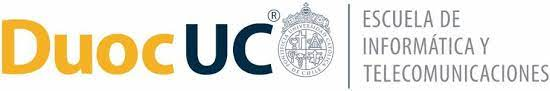

# Actividad Sumativa: Programando Redes Recurrentes


Nombre Estudiante: Matias Barrera Rivera

Docente: Sebastián Rodriguez

Sección: DLY0200 - 900D

**Descripción de la actividad**

A continuación, te invitamos a desarrollar la siguiente **actividad sumativa, de carácter grupal con el mismo equipo que han venido trabajando.** Esta actividad es de caracter obligatorio.

*   Tendrán dos semanas para su desarrollo. 
*   Organicen la forma de trabajo durante estas dos semanas, acuerden horarios, funciones y tareas, para que tengan una buena experiencia de trabajo en equipo.

El propósito es que **logren programar una RNN-LSTM**, que realice **análisis de texto**. También, para que contrasten la arquitectura de esta red, con las ya programadas en actividades anteriores.

La actividad está estructurada en dos partes, parte 1 (entrega semana 11), y parte 2 (entrega semana 12). En donde deberán **consolidar respuestas anteriores**, corregidas por la retroalimentación docente, más lo nuevo solicitado para la entrega final.

Es importante, que puedan **revisar los recursos de aprendizaje disponibles para estas semanas**. Estos, otorgarán las herramientas necesarias para  desarrollar esta actividad. 

Recurrir como base a los siguientes recursos de aprendizaje :
 
* Redes Recurrentes Parte 1.
* Redes Recurrentes Parte 2.
* Goodfellow, I., Bengio, Y., & Courville, (2017) Recurrent Neural Networks. En  Deep Learning. The MIT PressCambridge. (pp.368 - 382).
* Goodfellow, I., Bengio, Y., & Courville, (2017) Bidirectional RNNs. En  Deep Learning. The MIT PressCambridge. (pp.383 - 384).
* Goodfellow, et al. (2017) The Long Short-Term Memory and Other Gated RNNsT. En Deep Learning. The MIT PressCambridge.(pp. 397 - 400).
* Videos de apoyo actividad.


**Recuerden, generar una copia en su DRIVE de este archivo, antes de editarlo. Si presentan dudas o consultas en relación con la evaluación, pueden comunicarse con su docente FOL, a través de los medios de comunicación disponibles en el ambiente virtual de aprendizaje (AVA).** 

Una vez finalizada la actividad sumativa, exporten este archivo **.ipynb** que contenga: **código y respuestas**, luego **cada integrante** debe subir su archivo, en el espacio de entrega dispuesto en el ambiente virtual de aprendizaje, según las indicaciones que allí encontrarán.


**IMPORTANTE:** En esta experiencia, realizarán varias ejecuciones del jupyter notebook que están desarrollando, por lo que se sugiere puedan distribuir el trabajo en el plazo, y así no se verán reducidos los recursos que disponibiliza Google a través de Colaboratory. 

## Parte 1. Semana 11: Redes Recurrentes

**EducaDL** se ha planteado como un nuevo proyecto, **implementar redes neuronales para poder analizar las evaluaciones de sus docentes**, basándose en los **comentarios que realizan los apoderados** de la institución. Para ello, y como aún no se tiene implementado este nuevo sistema de evaluación, la institución sugiere **generar el entrenamiento de una red neuronal basado en un dataset de comentarios de clientes de Amazon**, y luego cuando esté entrenado el modelo, implementarlo en el contexto del problema. 

El dataset lo puedes encontrar en el ambiente de aprendizaje virtual como **5_AmazonComentarios.txt**

Deberán programar una **RNN simple** en función del caso planteado para esta actividad, utilizando como guía el material disponible en las experiencias de aprendizaje, además del video de apoyo que se encuentra en el ambiente virtual de aprendizaje, comparando el rendimiento del modelo a través del uso de las diferentes herramientas y arquitecturas revisadas en los recursos de aprendizaje.

**Registren los resultados obtenidos**, e intenten **garantizar la generalización del modelo** a través del aumento de accuracy y disminución de loss, de modo que puedan contrastar las primeras ejecuciones utilizando la red recurrente, con las arquitecturas antes efectuadas, métodos y ajustes.

**Recuerden evidenciar los resultados de la primera y la mejor ejecución**.


In [ ]:
# Kaggle API Key

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargando y descomprimiendo el dataset desde Kaggle

! kaggle datasets download -d matiasbarrera/amazoncomentarios
! unzip -qq amazoncomentarios.zip
print('Archivos Listos!')

100% 466M/467M [00:23<00:00, 25.6MB/s]
100% 467M/467M [00:23<00:00, 21.0MB/s]
Archivos Listos!


In [ ]:
# Importando las librerías

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, Markdown

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
# Descargando set de palabras que no aportan al entrenamiento
# Debido a que los ejemplos están en inglés, se descargan las palabras de dicho idioma

nltk.download('stopwords')
stop_words = stopwords.words('english')
for i in range(20):
  print(stop_words[i])

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Función para generar la matriz de confusión y reporte con varias métricas

def report(real, predictions):
  matrix = confusion_matrix(real, predictions)
  display(Markdown(f'### True Negatives: {matrix[0][0]}'))
  display(Markdown(f'### False Positives: {matrix[0][1]}'))
  display(Markdown(f'### False Negatives: {matrix[1][0]}'))
  display(Markdown(f'### True Positives: {matrix[1][1]}'))
  plt.figure(figsize=(8, 8))
  sns.heatmap(matrix, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='g')
  plt.title('Matrix de Confusión')
  plt.xlabel('Predicciones')
  plt.ylabel('Etiquetas')
  plt.show()
  print('\n', classification_report(real, predictions))

In [ ]:
# Función para diagramar la evolución del accuracy y loss
def acc_loss_plot(history, epochs, plot_size=(20, 20)):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=plot_size)

  ax_1 = plt.subplot(2,2,1)
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title(f'Accuracy Model\nacc: {round(acc[-1], 3)}, val_acc: {round(val_acc[-1], 3)}', fontsize=15)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['ACC', 'VAL_ACC'], loc='lower right')
  plt.grid(True)
  plt.xticks(range(0,epochs))

  ax_2 = plt.subplot(2,2,2)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title(f'Loss Model\nloss: {round(loss[-1], 3)}, , val_loss: {round(val_loss[-1], 3)}', fontsize=15)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['LOSS', 'VAL_LOSS'], loc='lower left')
  plt.grid(True)
  plt.xticks(range(0,epochs))
  plt.show()

#### Cargando el dataset desde Kaggle que subí previamente.
Se lee el dataset tal como fue facilitado y se eliminan las "stopwords", que consisten en preposiciones y otras palabras que aportan poco al modelo según la información investigada.
Como el proceso de eliminar las preposiciones y otras palabras toma mucho tiempo, en los archivos se descargarán se encuentra uno llamado preproc_coment, el cual se carga en la linea subsiguiente con esa parte del preprocesamiento lista.

In [ ]:
coments = pd.read_csv('/content/5_AmazonComentarios.txt', sep=';',
                       encoding='latin-1', header=None, 
                       names=['Sentimiento', 'Comentario'])


# Con la ayuda del set de palabras descargados de la librería nltk
# estas se eliminan de la columna de comentarios
coments['Comentario'] = coments['Comentario'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))

print('Cantidad de datos:', coments.shape[0])

# Guardando en archivo para no procesar nuevamente las palabras
# coments.to_feather('preproc_coment')

Cantidad de datos: 1448575


In [ ]:
# Importando archivo con el set de datos sin preposiciones u otras palabras poco relevantes

coments = pd.read_feather('/content/preproc_coment', columns=['Sentimiento', 'Comentario'])
print('Cantidad de datos:', coments.shape[0])

Cantidad de datos: 1448575


In [ ]:
# Analizando la proporción entre comentarios positivos y negativos

positive = sum(coments['Sentimiento' ]== 'Positivo')
negative = sum(coments['Sentimiento' ]== 'Negativo')

display(Markdown(f'### Nº comentarios positivos: {positive}'))
display(Markdown(f'### Nº comentarios negativos: {negative}'))

fig = px.bar(x=['Positivo', 'Negativo'], y=[positive, negative], 
             width=700, title='Proporción de Comentarios')
fig.show()

### Nº comentarios positivos: 730160

### Nº comentarios negativos: 718415

El dataset está bien balanceado entre las dos categorías de comentarios

In [ ]:
coments['Comentario']

0          Stuning even non-gamer: sound track beautiful!...
1          best soundtrack ever anything.: I'm reading lo...
2          Amazing!: soundtrack favorite music time, hand...
3          Excellent Soundtrack: truly like soundtrack en...
4          Remember, Pull Jaw Floor Hearing it: played ga...
                                 ...                        
1448570    Unbelievable- Bad Way: bought Thomas son huge ...
1448571    Almost Great, Broke...: son recieved birthday ...
1448572    Disappointed !!!: bought toy son loves "Thomas...
1448573    Classic Jessica Mitford: compilation wide rang...
1448574    Comedy Scene, Heard: DVD disappointment get ho...
Name: Comentario, Length: 1448575, dtype: object

A continuación se convierte la columna 'Sentimiento' a datos binarios 0 y 1, donde 0 significa sentimiento negativo y 1 sentimiento positivo.
Luego se separan en tres el dataset en datos para entrenamiento, validación y testing.

In [ ]:
coments.loc[coments['Sentimiento'] == 'Positivo', 'Sentimiento'] = 1
coments.loc[coments['Sentimiento'] == 'Negativo', 'Sentimiento'] = 0

coments['Sentimiento'] = coments['Sentimiento'].astype(np.float32)

train_valid, test = train_test_split(coments, test_size=0.1, random_state=42)

train, valid = train_test_split(train_valid, test_size=0.2, random_state=42)

In [ ]:
results = set()
coments['Comentario'].str.lower().str.split().apply(results.update)
print(len(results))
del results

2315630


Separando las columnas entre la dependiente (sentimiento) y la independiente (comentario)

In [ ]:
train_y = train['Sentimiento']
valid_y = valid['Sentimiento']
test_y = test['Sentimiento']

train_x = train['Comentario']
valid_x = valid['Comentario']
test_x = test['Comentario']

Con la ayuda de la clase Tokenizer, se crea un "diccionario" de palabras, donde cada palabra se mapea con un numero entero. El tope de palabras que va a "recordar" y mapear es de 20.000 

In [ ]:
tokenizer = Tokenizer(num_words=600000)
tokenizer.fit_on_texts(train_x)

In [ ]:
tokenizer.num_words

600000

Ahora se transforman los textos de entrenamiento, validacion y testing de acuerdo al diccionario que se creó anteriormente. 
Para estandarizar el largo de cada frase, se hace un padding de las sequencias, determinando un máximo en la longitud de 500.

In [ ]:
train_x = tokenizer.texts_to_sequences(train_x)
valid_x = tokenizer.texts_to_sequences(valid_x)
test_x = tokenizer.texts_to_sequences(test_x)

max_legth = 500
train_x = pad_sequences(train_x, maxlen=max_legth)
valid_x = pad_sequences(valid_x, maxlen=max_legth)
test_x = pad_sequences(test_x, maxlen=max_legth)

#### Programando red neuronal recurrente inicial

In [ ]:
model = Sequential()

model.add(Embedding(tokenizer.num_words, 45, input_length=max_legth))
model.add(LSTM(45))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=BinaryCrossentropy(), optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_x, train_y, 
          batch_size=564, epochs=10, 
          validation_data=(valid_x, valid_y))

Epoch 1/10
1850/1850 [==============================] - 92s 46ms/step - loss: 0.2596 - accuracy: 0.8944 - val_loss: 0.2306 - val_accuracy: 0.9084
Epoch 2/10
1850/1850 [==============================] - 87s 47ms/step - loss: 0.2082 - accuracy: 0.9176 - val_loss: 0.2179 - val_accuracy: 0.9134
Epoch 3/10
1850/1850 [==============================] - 86s 47ms/step - loss: 0.1918 - accuracy: 0.9250 - val_loss: 0.2096 - val_accuracy: 0.9178
Epoch 4/10
1850/1850 [==============================] - 86s 47ms/step - loss: 0.1773 - accuracy: 0.9316 - val_loss: 0.2114 - val_accuracy: 0.9174
Epoch 5/10
1850/1850 [==============================] - 86s 47ms/step - loss: 0.1631 - accuracy: 0.9380 - val_loss: 0.2322 - val_accuracy: 0.9164
Epoch 6/10
1850/1850 [==============================] - 86s 47ms/step - loss: 0.1492 - accuracy: 0.9440 - val_loss: 0.2250 - val_accuracy: 0.9144
Epoch 7/10
1850/1850 [==============================] - 86s 47ms/step - loss: 0.1358 - accuracy: 0.9500 - val_loss: 0.2187 -

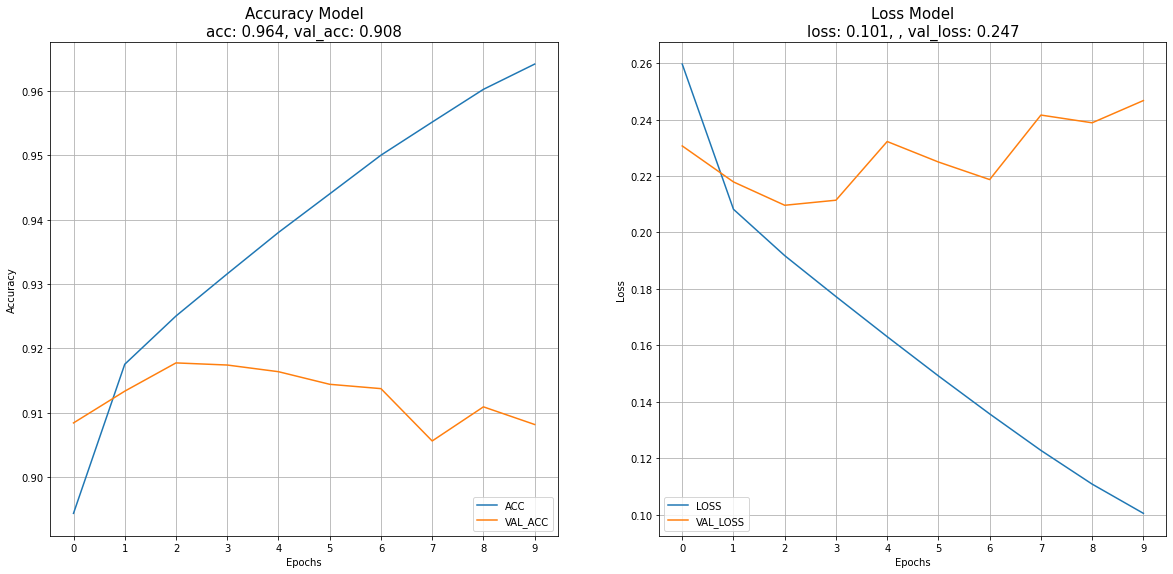

In [ ]:
acc_loss_plot(history, 10)

In [ ]:
model.evaluate(test_x, test_y)

4527/4527 [==============================] - 36s 8ms/step - loss: 0.2437 - accuracy: 0.9097


[0.24366424977779388, 0.9097046852111816]

In [ ]:
predictions = model.predict(test_x)

### True Negatives: 64585

### False Positives: 7294

### False Negatives: 5786

### True Positives: 67193

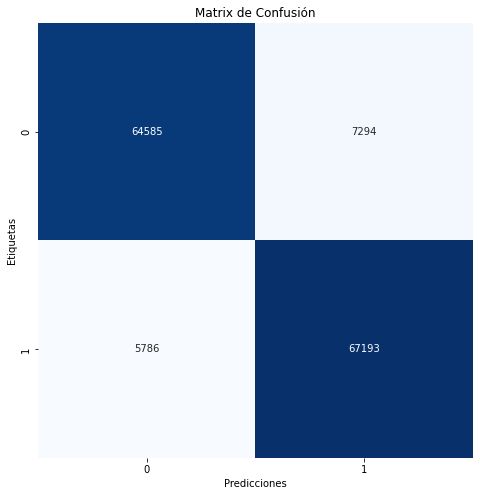


               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     71879
         1.0       0.90      0.92      0.91     72979

    accuracy                           0.91    144858
   macro avg       0.91      0.91      0.91    144858
weighted avg       0.91      0.91      0.91    144858



In [ ]:
report(test_y, np.round(predictions, 0))

$$
\begin{aligned}
& \hspace{30mm} \text {Primer resultado con RNN-LSTM }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Batch size } & \text {  N° épocas  } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 3 capas } & \text { 564 } & \text{10 épocas} & \text{0.908} & \text{0.24} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



#### Programando red recurrente con más hyperparámetros para mejorar generalización

In [ ]:
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        mode='min', min_delta=0.002, 
                        patience=5, verbose=True, 
                        restore_best_weights=True)

model_lstm = Sequential()

model_lstm.add(Embedding(tokenizer.num_words, 45, input_length=max_legth, embeddings_regularizer=l2()))
model_lstm.add(LSTM(45, return_sequences=True))
model_lstm.add(LSTM(20))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss=BinaryCrossentropy(), 
                   optimizer=RMSprop(), metrics=['accuracy'])

epochs = 20

history_lstm = model_lstm.fit(train_x, train_y, 
          batch_size=512, epochs=epochs, 
          validation_data=(valid_x, valid_y),
          callbacks=[early_stopping])

last_epoch_lstm = early_stopping.stopped_epoch if early_stopping.stopped_epoch != 0 else epochs

Epoch 1/20
2038/2038 [==============================] - 224s 107ms/step - loss: 1.4729 - accuracy: 0.8641 - val_loss: 0.3893 - val_accuracy: 0.8867
Epoch 2/20
2038/2038 [==============================] - 168s 83ms/step - loss: 0.3778 - accuracy: 0.8887 - val_loss: 0.4663 - val_accuracy: 0.8495
Epoch 3/20
2038/2038 [==============================] - 168s 83ms/step - loss: 0.3717 - accuracy: 0.8928 - val_loss: 0.3885 - val_accuracy: 0.8827
Epoch 4/20
2038/2038 [==============================] - 168s 83ms/step - loss: 0.3648 - accuracy: 0.8967 - val_loss: 0.3742 - val_accuracy: 0.8941
Epoch 5/20
2038/2038 [==============================] - 168s 82ms/step - loss: 0.3608 - accuracy: 0.8992 - val_loss: 0.3719 - val_accuracy: 0.8957
Epoch 6/20
2038/2038 [==============================] - 168s 82ms/step - loss: 0.3596 - accuracy: 0.9005 - val_loss: 0.3696 - val_accuracy: 0.8968
Epoch 7/20
2038/2038 [==============================] - 168s 82ms/step - loss: 0.3578 - accuracy: 0.9015 - val_loss: 

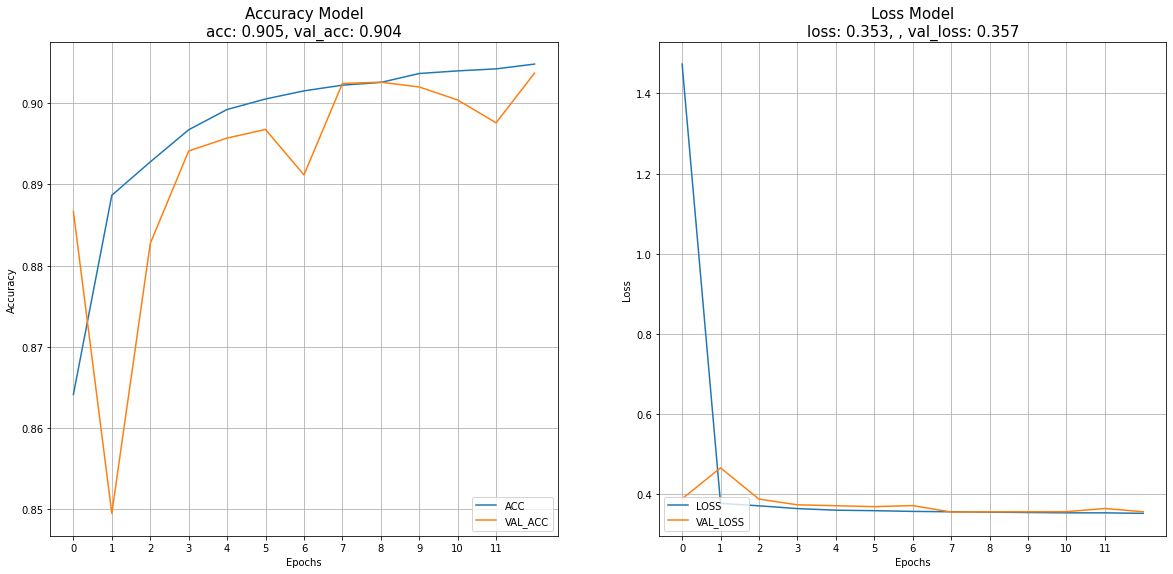

In [ ]:
acc_loss_plot(history_lstm, last_epoch_lstm)

In [ ]:
model_lstm.evaluate(test_x, test_y)

4527/4527 [==============================] - 71s 16ms/step - loss: 0.3545 - accuracy: 0.9029


[0.3545485734939575, 0.9028910994529724]

### True Negatives: 65286

### False Positives: 6593

### False Negatives: 7474

### True Positives: 65505

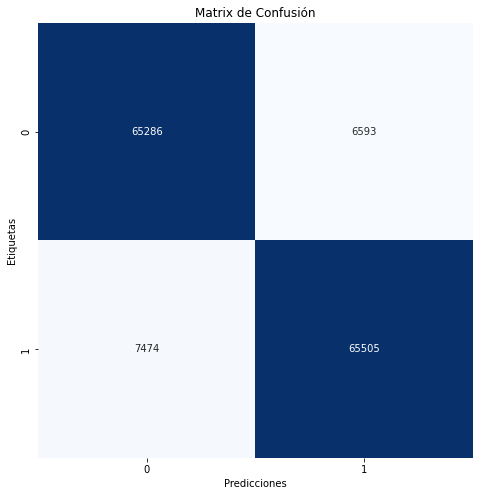


               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     71879
         1.0       0.91      0.90      0.90     72979

    accuracy                           0.90    144858
   macro avg       0.90      0.90      0.90    144858
weighted avg       0.90      0.90      0.90    144858



In [ ]:
predictions = model_lstm.predict(test_x)
report(test_y, np.round(predictions, 0))

Registren a continuación, la mejor ejecución que hayan tenido con RNN-LSTM en la siguiente tabla:

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Mejor resultado con Recurrente }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 3 capas } & \text{5 épocas} & \text{480} & \text{Dropout} & \text{RMSprop}  & \text{Sigmoid} & \text{0.922} & \text{0.198}\\
\hline
\end{array}
\end{aligned}
$$



Para mejorar la generalización, en primer lugar se creó el callback de earlystopping para evitar que el modelo se sobre-entrene. También se agregó el parametro 'return_sequences' para agregar una segunda capa LSTM y que esta reciba todos los estados ocultos anteriores.
Es decir, se aumento la capacidad de la red añadiendo una segunda capa LSTM con 20 neuronas. Por último, para bajar el overfitting se agregó una regularización de tipo l2 a la capa de embedding, lo que tuvo un efecto considerable en el entrenamiento, lograndose una mejor generalización del modelo y una evolución más estable.


A continuación se ve como se implementó la predicción por consola. Debido a que el set de datos recibido fue de frases en inglés, también se debe probar con frases en ese idioma. La red realiza la predicción con valores entre 0 y 1 ya que se usó una función de salida sigmoid. Mientras más cercano a 1 es positiva la frase y mientras más cercana a 0 es negativa. Para dar una respuesta concisa, se redondea el valor de salida de la red para que sea una respuesta binaria, es decir 0 o 1, y según eso se da la respuesta al usuario.


In [ ]:
# Función que toma la entrada de texto de la consola y 
# ocupa un modelo pasado por parámetro para predecir su sentimiento 

def pred_from_input(model):
  sentence = input('Ingrese la frase que desea evaluar:\n')
  sentence = tokenizer.texts_to_sequences([sentence])
  sentence = pad_sequences(sentence, maxlen=max_legth)
  prediction = round(model.predict(sentence)[0][0], 0)
  print('Frase positiva') if prediction == 1 else print('Frase negativa')

In [ ]:
pred_from_input(model_lstm)

Ingrese la frase que desea evaluar:
Never have to watch another movie, this was awesome
Frase positiva


Comenten aquí qué ocurrió con la predicción.

## Redes Recurrente con LSTM Bidireccional



#### Programando red recurrente bidireccional inicial


In [ ]:
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        mode='min', min_delta=0.005, 
                        patience=4, verbose=True, 
                        restore_best_weights=True)

model_bidir_ini = Sequential()

model_bidir_ini.add(Embedding(tokenizer.num_words, 45, input_length=max_legth, embeddings_regularizer=l2()))
model_bidir_ini.add(Bidirectional(LSTM(45, dropout=0.2)))
model_bidir_ini.add(Dense(1, activation='sigmoid'))

model_bidir_ini.compile(loss=BinaryCrossentropy(), optimizer='rmsprop', metrics=['accuracy'])

epochs = 20

history = model_bidir_ini.fit(train_x, train_y, 
          batch_size=564, epochs=epochs, 
          validation_data=(valid_x, valid_y),
          callbacks=[early_stopping])

last_epoch = early_stopping.stopped_epoch if early_stopping.stopped_epoch != 0 else epochs


Epoch 1/20
1850/1850 [==============================] - 309s 110ms/step - loss: 1.6048 - accuracy: 0.8554 - val_loss: 0.4023 - val_accuracy: 0.8810
Epoch 2/20
1850/1850 [==============================] - 202s 109ms/step - loss: 0.4028 - accuracy: 0.8821 - val_loss: 0.3940 - val_accuracy: 0.8867
Epoch 3/20
1850/1850 [==============================] - 201s 109ms/step - loss: 0.3984 - accuracy: 0.8855 - val_loss: 0.3866 - val_accuracy: 0.8912
Epoch 4/20
1850/1850 [==============================] - 201s 109ms/step - loss: 0.3959 - accuracy: 0.8888 - val_loss: 0.4013 - val_accuracy: 0.8881
Epoch 5/20
1850/1850 [==============================] - 201s 109ms/step - loss: 0.3933 - accuracy: 0.8908 - val_loss: 0.3898 - val_accuracy: 0.8902
Epoch 6/20
1850/1850 [==============================] - 201s 109ms/step - loss: 0.3904 - accuracy: 0.8924 - val_loss: 0.3783 - val_accuracy: 0.8979
Epoch 7/20
1850/1850 [==============================] - 201s 109ms/step - loss: 0.3885 - accuracy: 0.8934 - val_

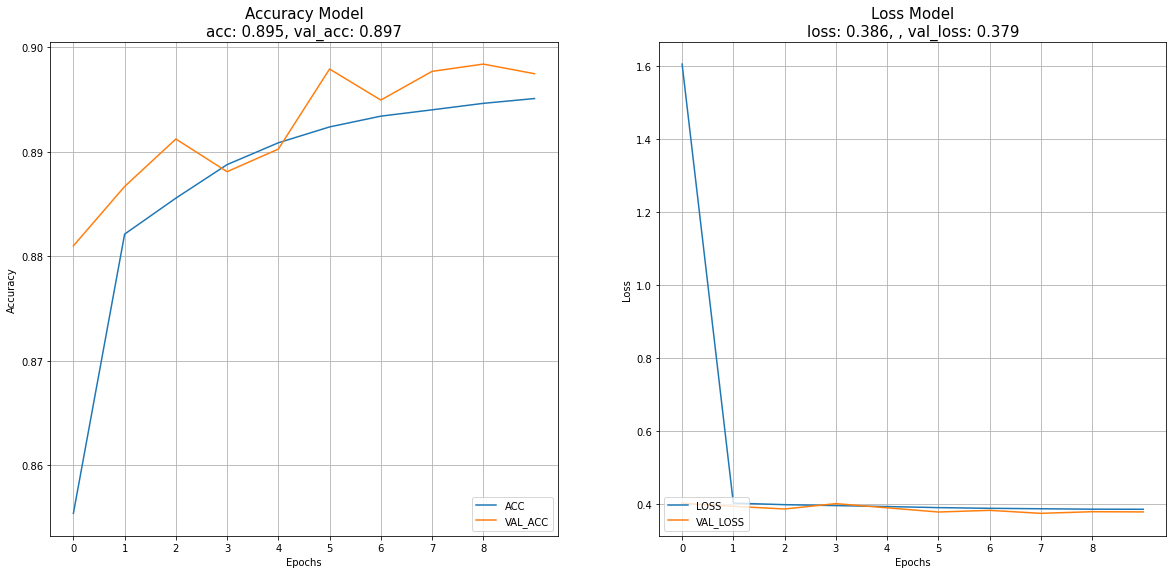

In [ ]:
acc_loss_plot(history, last_epoch)

In [ ]:
model_bidir_ini.evaluate(test_x, test_y)

4527/4527 [==============================] - 73s 16ms/step - loss: 0.3759 - accuracy: 0.8983


[0.3759010136127472, 0.8983487486839294]

### True Negatives: 63327

### False Positives: 8552

### False Negatives: 6173

### True Positives: 66806

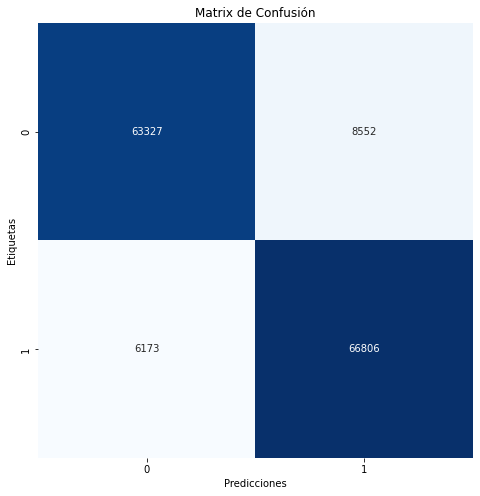


               precision    recall  f1-score   support

         0.0       0.91      0.88      0.90     71879
         1.0       0.89      0.92      0.90     72979

    accuracy                           0.90    144858
   macro avg       0.90      0.90      0.90    144858
weighted avg       0.90      0.90      0.90    144858



In [ ]:
predictions = model_bidir_ini.predict(test_x)
report(test_y, np.round(predictions, 0))

$$
\begin{aligned}
& \hspace{80mm} \text {Primer resultado con RNN-LSTM Bidireccional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 3 capas } & \text{10 épocas} & \text{564} & \text{l2} & \text{RMSprop}  & \text{Sigmoid} & \text{0.89} & \text{0.37}\\
\hline
\end{array}
\end{aligned}
$$



In [ ]:
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        mode='min', min_delta=0.005, 
                        patience=4, verbose=True, 
                        restore_best_weights=True)

model_bidir = Sequential()

model_bidir.add(Embedding(tokenizer.num_words, 45, input_length=max_legth, embeddings_regularizer=l2(1e-4)))
model_bidir.add(Bidirectional(LSTM(45, return_sequences=True)))
model_bidir.add(Bidirectional(LSTM(20)))
model_bidir.add(Dense(1, activation='sigmoid'))

model_bidir.compile(loss=BinaryCrossentropy(), optimizer='rmsprop', metrics=['accuracy'])

history_bidir = model_bidir.fit(train_x, train_y, 
          batch_size=564, epochs=20, 
          validation_data=(valid_x, valid_y),
          callbacks=[early_stopping])

last_epoch = early_stopping.stopped_epoch if early_stopping.stopped_epoch != 0 else epochs

Epoch 1/20
1850/1850 [==============================] - 322s 168ms/step - loss: 1.6058 - accuracy: 0.8541 - val_loss: 0.3889 - val_accuracy: 0.8852
Epoch 2/20
1850/1850 [==============================] - 311s 168ms/step - loss: 0.3822 - accuracy: 0.8873 - val_loss: 0.3825 - val_accuracy: 0.8904
Epoch 3/20
1850/1850 [==============================] - 310s 168ms/step - loss: 0.3946 - accuracy: 0.8835 - val_loss: 0.3810 - val_accuracy: 0.8891
Epoch 4/20
1850/1850 [==============================] - 314s 170ms/step - loss: 0.3738 - accuracy: 0.8916 - val_loss: 0.3725 - val_accuracy: 0.8936
Epoch 5/20
1850/1850 [==============================] - 310s 168ms/step - loss: 0.3705 - accuracy: 0.8942 - val_loss: 0.3912 - val_accuracy: 0.8847
Epoch 6/20
1850/1850 [==============================] - 310s 167ms/step - loss: 0.3625 - accuracy: 0.8985 - val_loss: 0.3573 - val_accuracy: 0.8998
Epoch 7/20
1850/1850 [==============================] - 312s 169ms/step - loss: 0.3582 - accuracy: 0.9000 - val_

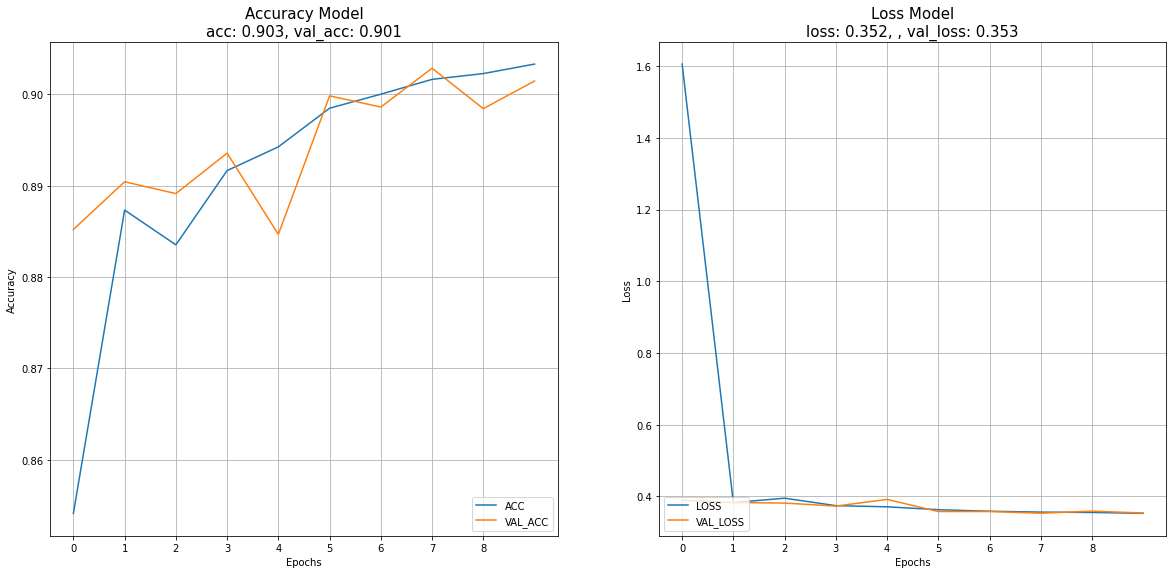

In [ ]:
acc_loss_plot(history_bidir, last_epoch)

In [ ]:
model_bidir.evaluate(test_x, test_y)

4527/4527 [==============================] - 128s 28ms/step - loss: 0.3544 - accuracy: 0.9013


[0.354401171207428, 0.9012688398361206]

### True Negatives: 65622

### False Positives: 6257

### False Negatives: 8045

### True Positives: 64934

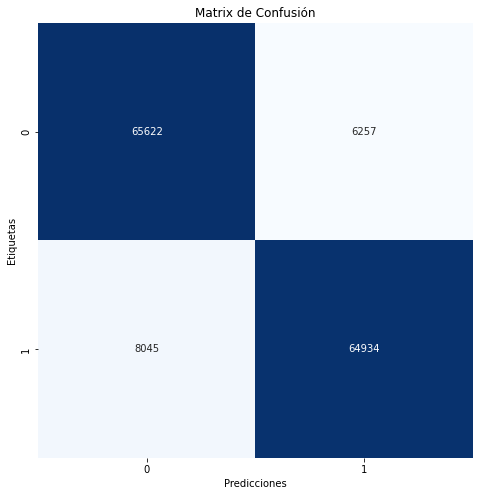


               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     71879
         1.0       0.91      0.89      0.90     72979

    accuracy                           0.90    144858
   macro avg       0.90      0.90      0.90    144858
weighted avg       0.90      0.90      0.90    144858



In [ ]:
predictions = model_bidir.predict(test_x)
report(test_y, np.round(predictions, 0))

$$
\begin{aligned}
& \hspace{80mm} \text {Mejor resultado con RNN-LSTM Bidireccional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text{10 épocas} & \text{564} & \text{l2} & \text{RMSprop}  & \text{Sigmoid} & \text{0.90} & \text{0.353}\\
\hline
\end{array}
\end{aligned}
$$

